In [1]:
from model import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    print(i, flush=True)

9


In [2]:
# model = RegionModel(
#     international_trade = True
#     ,efficiency_stdev = 2
#     ,eu_tax = 0.2
#     ,neighbor_influence = 0.05
#     ,tax_influence = 0.1
#     ,member_trade_multiplier = 1.3
#     ,benefit_distribution = 1.1
# )

# for _ in range(100):
#     clear_output(wait=True)
#     model.step()
#     print(model.member_count, model.other_count)
    

In [37]:
rows

array([0.01  , 0.1325, 0.255 , 0.3775, 0.5   ])

In [43]:
rows = np.linspace(0.08, 0.5, 7)
columns = np.linspace(0.5, 0.95, 7)
sims = 5
steps = 500

data = np.zeros((len(rows), len(columns), sims, 11))

for i, EUT in enumerate(rows):
    for j, BD in enumerate(columns):
        for k in range(sims):
            model = RegionModel(
                international_trade = True
                ,efficiency_stdev = 2
                ,eu_tax = EUT
                ,neighbor_influence = 0.05
                ,tax_influence = 0.1
                ,member_trade_multiplier = 2
                ,benefit_distribution = BD
            )
            for l in range(steps):
                clear_output(wait=True)
                percentage = i*len(columns)*sims*steps + j*sims*steps + k*steps + l
                print("{:.3f}%".format(percentage*100/(len(rows)*len(columns)*sims*steps)))
                model.step()
            model.compute_statistics()
            model.datacollector.collect(model)
            # print("{:.1f}%".format((((i)*len(columns))+(j+1))*100/(len(columns)*len(rows))))
            data[i,j,k] = model.datacollector.get_model_vars_dataframe()
            

99.999%


In [46]:
# data

In [47]:
# np.save("230121_18h00_tax-linspace-008-05-7_benefit-linspace-05-095-7_sims-5_steps-500", data)

In [50]:
# model.datacollector.collect(model)
# model.datacollector.get_model_vars_dataframe()
xyz = np.load("230121_18h00_tax-linspace-008-05-7_benefit-linspace-05-095-7_sims-5_steps-500.npy")

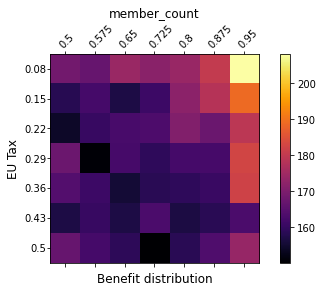

-------------------------------------------------------


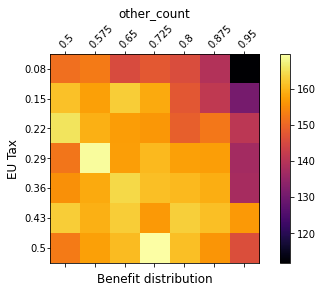

-------------------------------------------------------


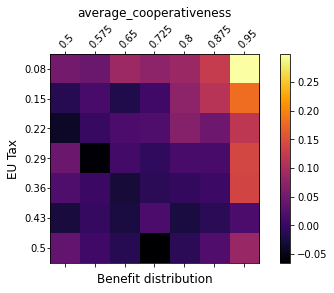

-------------------------------------------------------


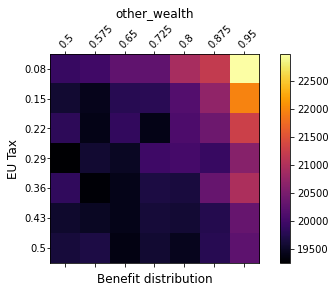

-------------------------------------------------------


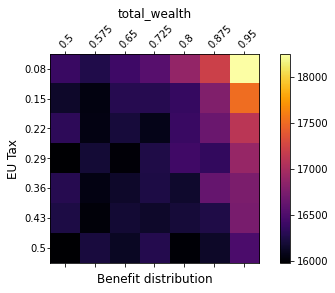

-------------------------------------------------------


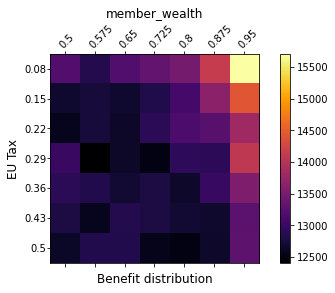

-------------------------------------------------------


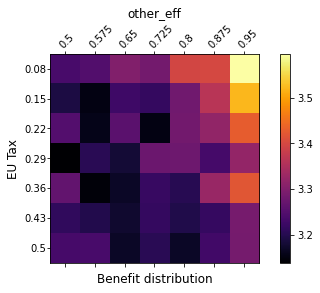

-------------------------------------------------------


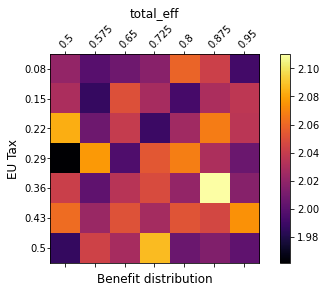

-------------------------------------------------------


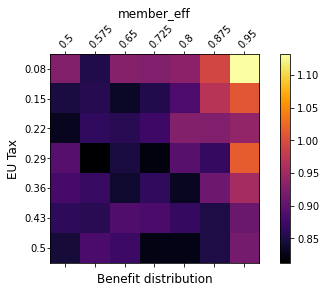

-------------------------------------------------------


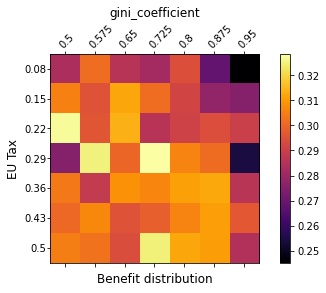

-------------------------------------------------------


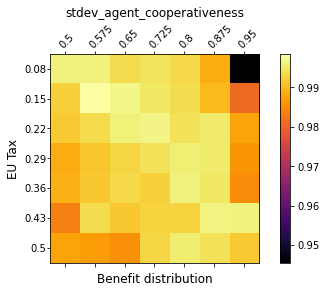

-------------------------------------------------------


In [51]:
data = np.mean(xyz, axis=2)

for i, name in enumerate(model.datacollector.get_model_vars_dataframe().columns):

    fig = plt.figure()
    ax = fig.add_subplot()
    cax = ax.matshow(data[:,:,i], cmap="inferno")
    plt.xlabel("Benefit distribution", labelpad=10)
    ax.yaxis.label.set_size(12)
    ax.xaxis.label.set_size(12)
    plt.ylabel("EU Tax")
    ax.set_yticklabels([''] + list(np.round(rows, 3)))  
    ax.set_xticklabels([''] + list(np.round(columns, 3)))
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
    plt.colorbar(cax)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.tight_layout()
    ax.tick_params(axis="y", pad=0)
    ax.tick_params(axis="x", pad=0)
    plt.title(name)
    # plt.tight_layout()
    # plt.savefig("img/{}.png".format(arr_name), dpi=300)
    plt.show()
    print("-------------------------------------------------------")

In [17]:
for _ in range(100): model.step()
model.compute_statistics()
model.datacollector.collect(model)

In [18]:
np.std([agent.wealth for agent in model.agents])

2642.0399010931274

In [19]:
df = model.datacollector.get_model_vars_dataframe()
df

,member_count,other_count,average_cooperativeness,other_wealth,total_wealth,member_wealth,other_eff,total_eff,member_eff,gini_coefficient,stdev_agent_cooperativeness
0,2,318,-0.98750,2257.631524,2297.520543,8639.874514,1.980987,2.012259,6.984574,0.595620,0.157619
1,1,319,-0.99375,5010.810561,5047.081020,16617.357314,1.996304,2.012259,7.101729,0.554104,0.111629


In [9]:
%timeit for _ in range(1): model.step()

11.5 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
(0.012 * 1000 * 7**6)/(60*60*24)

32.680277777777775

In [14]:
7**2

49

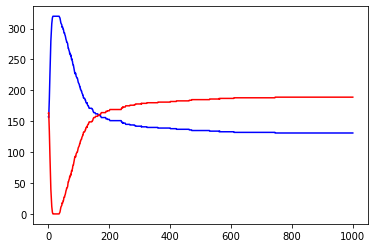

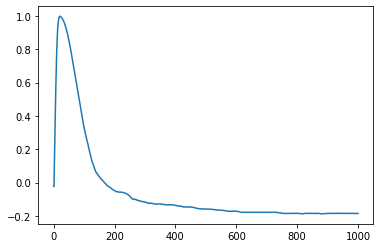

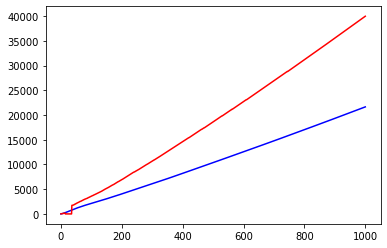

In [10]:
df = model.datacollector.get_model_vars_dataframe()
df2 = model.datacollector.get_agent_vars_dataframe()
plt.plot(df["member_count"], color="blue")
plt.plot(df["other_count"], color="red")
plt.show()

plt.plot(df["average_cooperativeness"])
plt.show()

plt.plot(df["member_wealth"], color="blue")
plt.plot(df["other_wealth"], color="red")
plt.show()

(array([60., 62., 59., 45., 39., 25., 20.,  6.,  2.,  2.]),
 array([3.99450726e-03, 4.08135986e-01, 8.12277464e-01, 1.21641894e+00,
        1.62056042e+00, 2.02470190e+00, 2.42884338e+00, 2.83298486e+00,
        3.23712633e+00, 3.64126781e+00, 4.04540929e+00]),
 <BarContainer object of 10 artists>)

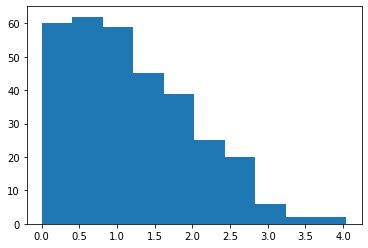

In [3]:
a1 = model.agents[0]
a2 = model.agents[1]

In [10]:
# model.step()
# for agents in model.agents:
#     # agents.step()
#     # agents.choose_strategy()
#     # agents.update_wealth
#     neighbor = agents.get_neighbor()
#     # agents.interact(neighbor)
#     agents.CC(neighbor)
#     # self.update_cooperativeness(neighbor)

In [8]:
a1.model.basic_trade_reward

0.2

In [13]:
model.calculate_benefit()

ZeroDivisionError: division by zero

In [24]:
a2.cooperativeness

0.307982750577805

In [25]:
# a1.CC(a2)
a1.DD(a2)

0
0
-0.20736
-0.20736


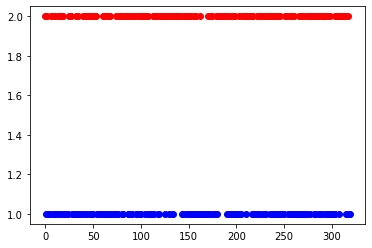

In [26]:
plt.scatter([a.unique_id for a in model.agents if a.strategy == 2], [a.strategy for a in model.agents if a.strategy == 2], color="red")
plt.scatter([a.unique_id for a in model.agents if a.strategy == 1], [a.strategy for a in model.agents if a.strategy == 1], color="blue")


In [60]:
model.step()
model.datacollector.get_model_vars_dataframe()

,collaborator_count,defector_count,av_coop,other_wealth,total_wealth,member_wealth
0,156,164,NaN,0,0,0
1,156,164,-0.015935,164,320,156
2,156,164,-0.015935,328,640,312
3,156,164,-0.015935,492,960,468
4,156,164,-0.015935,656,1280,624
5,156,164,-0.015935,820,1600,780
6,156,164,-0.015935,984,1920,936
7,156,164,-0.015935,1148,2240,1092
8,156,164,-0.015935,1312,2560,1248
9,156,164,-0.015935,1476,2880,1404
